In [109]:
#%load_ext autoreload
#%autoreload 2


In [110]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import lane_detection as ld
import lane_following as lf
import importlib

importlib.reload(ld)


<module 'lane_detection' from '/home/devashishdas/cv-intro/lane_detection.py'>

In [111]:
IP_ADDRESS = "192.168.1.102"

In [112]:
'''
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame
        vcap.release()

vcap.release()
'''

'\nvcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")\n\nimg = None\n\nMAX_RETRY = 100\ncount = 0\nwhile count < MAX_RETRY:\n    count += 1\n    # Obtain the frame\n    ret, frame = vcap.read()\n\n    # Check frame was received successfully\n    if ret:\n        # got a frame, close the cap and return the frame\n        print(" got a frame ")\n        img = frame\n        vcap.release()\n\nvcap.release()\n'

In [113]:
img = cv2.imread('three_lane_frame.jpeg')
type(img)

numpy.ndarray

(720, 1280, 3)


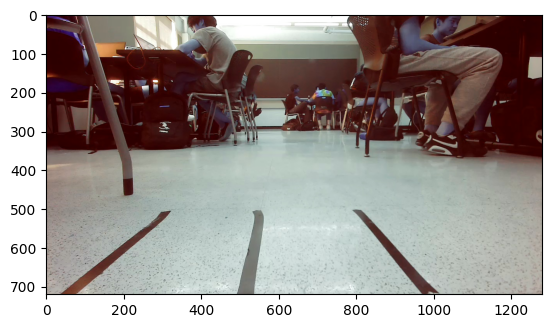

In [114]:
#lines = ld.detect_lines(img)
#lanes = ld.detect_lanes(img)
#ld.draw_lines(img, lanes)
plt.imshow(img)
print(np.shape(img))

In [115]:
lines = ld.detect_lines(img)
print(lines)


[[[  53  705  283  525]]

 [[ 550  115  732  115]]

 [[ 484   77  697   77]]

 [[ 561   29  723   29]]

 [[ 815  529  969  718]]

 [[ 828  518  982  688]]

 [[1069   57 1186    0]]

 [[ 141  666  309  525]]

 [[ 735  267  853  286]]

 [[ 131  185  196  385]]

 [[ 723  276  833  290]]

 [[ 459  239  565  242]]

 [[ 599   31  769   33]]

 [[ 643   21  815   21]]

 [[  10  601  175  513]]

 [[ 153  162  215  355]]

 [[ 483   79  606   79]]

 [[ 454  237  555  241]]

 [[ 724  280  832  297]]

 [[ 181   91  342   91]]

 [[ 804  516  955  702]]

 [[ 671   23  805   23]]

 [[ 102    2  163  201]]

 [[  98   79  195  379]]

 [[ 262  101  377  101]]

 [[ 616   41  743   41]]

 [[ 679   78  807   78]]

 [[1076  151 1177  124]]

 [[  78  718  184  635]]

 [[ 226   17  347   99]]

 [[1015   81 1132   85]]

 [[ 537  708  562  525]]

 [[  74  688  230  566]]

 [[  86   32   99  136]]]


In [116]:
lanes = ld.detect_lanes(lines.tolist())

[[[53, 705, 283, 525]], [[550, 115, 732, 115]], [[484, 77, 697, 77]], [[561, 29, 723, 29]], [[815, 529, 969, 718]], [[828, 518, 982, 688]], [[1069, 57, 1186, 0]], [[141, 666, 309, 525]], [[735, 267, 853, 286]], [[131, 185, 196, 385]], [[723, 276, 833, 290]], [[459, 239, 565, 242]], [[599, 31, 769, 33]], [[643, 21, 815, 21]], [[10, 601, 175, 513]], [[153, 162, 215, 355]], [[483, 79, 606, 79]], [[454, 237, 555, 241]], [[724, 280, 832, 297]], [[181, 91, 342, 91]], [[804, 516, 955, 702]], [[671, 23, 805, 23]], [[102, 2, 163, 201]], [[98, 79, 195, 379]], [[262, 101, 377, 101]], [[616, 41, 743, 41]], [[679, 78, 807, 78]], [[1076, 151, 1177, 124]], [[78, 718, 184, 635]], [[226, 17, 347, 99]], [[1015, 81, 1132, 85]], [[537, 708, 562, 525]], [[74, 688, 230, 566]], [[86, 32, 99, 136]]]
[-0.782608695652174]
[-426.16666666666663]
error: divided by zero

error: divided by zero

error: divided by zero

[-0.782608695652174, 1.2272727272727273]
[-426.16666666666663, 1263.962962962963]
[-0.782608695652

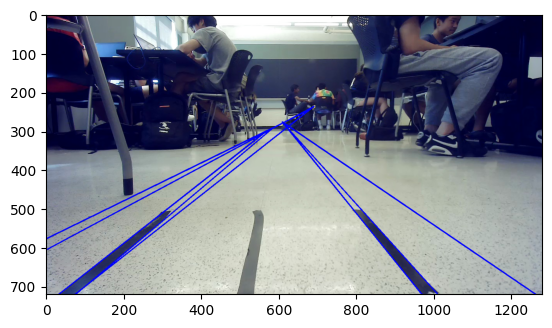

In [117]:


ld.draw_lanes(img, lanes)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))